In [5]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [6]:
def TotalCost(u):
  fill=np.array([2*(cp.maximum(x,0))**2 + 30*cp.maximum(x,0) for x in u])
  cut=np.array([12*(cp.maximum(-x,0))**2 + cp.maximum(-x,0) for x in u])
  return fill+cut

In [21]:
#Data
n=100
x=np.linspace(1,101,100)
e=[]
for i in x:
  e += [5*np.sin(3*np.pi*i/n)+np.sin(10*np.pi*i/n)]
e = np.array(e)
d=np.arange(1,101,1)
D=[0.08,0.025,0.005]

h=cp.Variable(n)
u=h-e

#derivatives
G1=np.zeros((n,1))
G2=np.zeros((n,1))
G3=np.zeros((n,1))

constraints=[]

G1=h[1:(h.shape[0])-1]-h[0:(h.shape[0])-2]
G2=G1[1:(G1.shape[0])-1]-G1[0:(G1.shape[0])-2]
G3=G2[1:(G2.shape[0])-1]-G2[0:(G2.shape[0])-2]
constraints=[cp.max(cp.abs(G1))<=D[0],cp.max(cp.abs(G2))<=D[1],cp.max(cp.abs(G3))<=D[2]]

cost_shape= TotalCost(u).shape[0]
objective =cp.Minimize(cp.norm2(sum(TotalCost(u))))

prob=cp.Problem(objective,constraints)

prob.solve()
print("optimal cost:",prob.solve())
print("optimized heights:",h.value)

# fill = []
# for x in u.value:
#   fill += [2*(max(x,0))**2 + 30*max(x,0)]

# fill = np.array(fill)
fill=np.array([2*(max(x,0))**2 + 30*max(x,0) for x in u.value])


# cut = []
# for x in u.value:
#   [12*(max(-x,0))**2 + max(-x,0)]

# cut = np.array(cut)
cut=np.array([12*(max(-x,0))**2 + max(-x,0) for x in u.value])

optimal cost: 7520.570154150903
optimized heights: [ 2.48763058  2.56763054  2.64763054  2.72763058  2.80563058  2.87663045
  2.93563011  2.97762946  2.99762843  2.99262748  2.96262662  2.91262586
  2.84762527  2.77262493  2.6926249   2.61262488  2.53262485  2.45262483
  2.3726248   2.29262477  2.21262474  2.13262471  2.05262468  1.97262465
  1.89262462  1.81262459  1.73262456  1.65262453  1.5726245   1.49262447
  1.41262444  1.33262441  1.25262438  1.17262435  1.09262432  1.0126243
  0.93262427  0.85262424  0.77262421  0.69262419  0.61262416  0.53262413
  0.45262411  0.37262409  0.29262407  0.2146691   0.14375926  0.0848946
  0.04307517  0.02330101  0.02852676  0.05870798  0.10884431  0.17393542
  0.24898112  0.3289813   0.40898127  0.48898131  0.56898136  0.6489814
  0.72898144  0.80898148  0.88898153  0.96898157  1.04898161  1.12898166
  1.2089817   1.28898175  1.36898179  1.44898183  1.52898187  1.60898192
  1.68898196  1.768982    1.84898204  1.92898208  2.00898212  2.08898216
  2

Text(0.5, 1.0, 'Fill Cost')

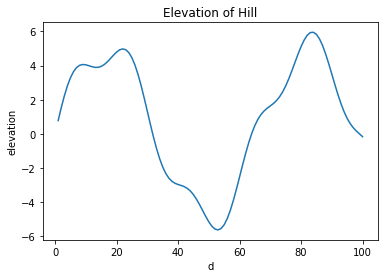

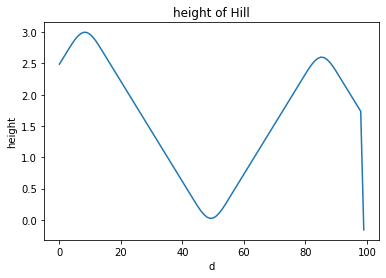

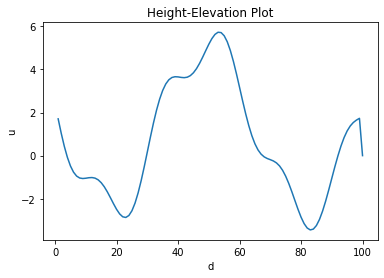

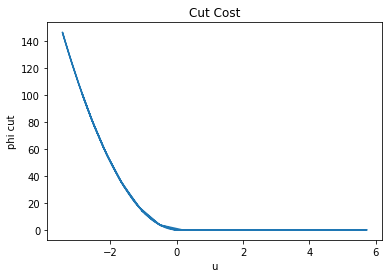

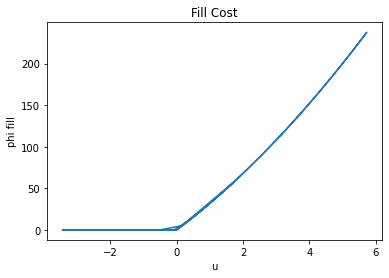

In [22]:
#Plots
plt.figure()
plt.plot(d,e)
plt.xlabel("d")
plt.ylabel("elevation")
plt.title("Elevation of Hill")

plt.figure()
plt.plot(h.value)
plt.xlabel("d")
plt.ylabel("height")
plt.title("height of Hill")

plt.figure()
plt.plot(d,u.value)
plt.xlabel("d")
plt.ylabel("u")
plt.title("Height-Elevation Plot")

plt.figure()
plt.plot(u.value,cut)
plt.xlabel("u")
plt.ylabel("phi cut")
plt.title("Cut Cost")

plt.figure()
plt.plot(u.value,fill)
plt.xlabel("u")
plt.ylabel("phi fill")
plt.title("Fill Cost")